In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('processed.cleveland.data',header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [6]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [11]:
df.isnull().value_counts()

age    sex    cp     restbp  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   hd   
False  False  False  False   False  False  False    False    False  False    False  False  False  False    303
dtype: int64

In [13]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [14]:
df['ca'].unique()#question mark represent missing values
#object dtypes means there are mixtures of things like mixture of number and literals

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [17]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [21]:
# print rows that contain missing values
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [25]:
df_no_missing=df.loc[(df['ca']!='?') & (df['thal']!='?')]

In [26]:
len(df_no_missing)

297

In [28]:
# split data X=feature y=target
X=df_no_missing.drop('hd',axis=1) #alteanate X=df_no_missing.iloc[:,:-1]
X.head(2)

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0


In [34]:
y=df_no_missing['hd']
y.head(2)

0    0
1    2
Name: hd, dtype: int64

In [35]:
X.dtypes



age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

ONe hot encoding for categorical values
basically convert columns with more than 2 categories like cp,slope,thal not like sex,fbs,exang(because this contain only 2 values

In [36]:
X['cp'].unique()#ches pain

array([1., 4., 3., 2.])

method to do onehot : ColumnTransformer(scikit learn), get_dummies(pandas)

In [39]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


now agian one hot encoding for others columns cp,restcg,slope,thal

In [41]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])#puts all colunsn it doesent process in the front and it puts cp and others at end
X_encoded()#must verify the all columns that only contain accepted categorey

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


In [42]:
y.unique()

array([0, 2, 1, 3, 4])

now see hd contain different 5 level of heart diesease so convert hd numbers >0 to 1

In [45]:
y_not_zero_idx=y>0#get index for each non-zero value in y
y[y_not_zero_idx]=1# set each non zero value in y to 1
y.unique()#verify that it only contain 0 and 1


<ipython-input-45-6245e3b4bc1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_idx]=1# set each non zero value in y to 1
<ipython-input-45-6245e3b4bc1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y_not_zero_idx]=1# set each non zero value in y to 1


array([0, 1])

finally finished formatting the data for making classificatin Tree

Build A Premilinarty classification tree because it is not optimized yet

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X_encoded,y,random_state=42)

#crate tree and fit training data
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,y_train)

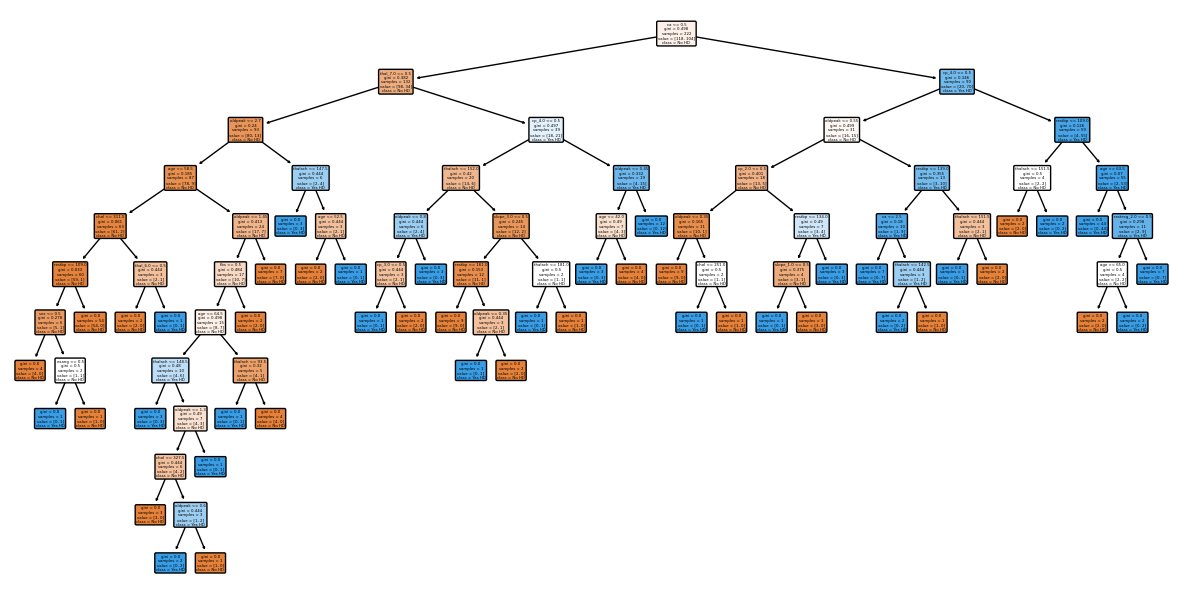

In [55]:
# //we plot tree aand it is huge
plt.figure(figsize=(15,7.5))
from sklearn import tree
tree.plot_tree(clf_dt,filled=True,rounded=True,class_names=["No HD","Yes HD"],
          feature_names=X_encoded.columns);

Now let see on testing dataset by running the testing dataset down the tree and drawing the confusion matrix

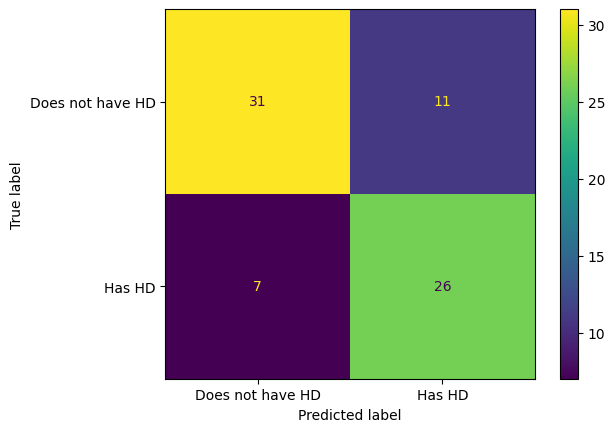

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions=clf_dt.predict(X_test)
cm=confusion_matrix(y_test,predictions,labels=clf_dt.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Does not have HD","Has HD"])
disp.plot()

IN confusion matrix we see that of 31+11 =42 people that did not have hd,31(74%) were corretly classified.And of the 7+26 people have hd,26(79%) were corretly classified.we do better by reducing overfitting of the trainig dataset it if exits.Prunin in theory should solve the overfitting problem

It seems quite a significant portion


 ~ 26%

of subjects who do not have heart disease are misclassified in the testing set.

And


 ~ 21%

who has heart disease were missed by the model's predictions

ccp part 1 : visualize alpha Put plainly, pruning is the action of selectively removing certain parts of a trees to promote its growth. Reducing the number of leaf nodes may result in slightly worse training accuracy, but greatly improve testing performance. Alpha is a pruning parameter, and the higher the alpha, the more nodes will be pruned.

In [68]:
from sklearn.tree import DecisionTreeClassifier
path=clf_dt.cost_complexity_pruning_path(X_train,y_train)#determin value for alpha
ccp_alphas=path.ccp_alphas #extract different values for alpha
ccp_alphas=ccp_alphas[:-1]#exclude the maximum value for alpha

clf_dts=[] #create array that we will put decision trees into

# now create onr decison tree per vvalue for alpha and store in array
for ccp_alpha in ccp_alphas:
        clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
        clf_dt.fit(X_train,y_train)
        clf_dts.append(clf_dt)

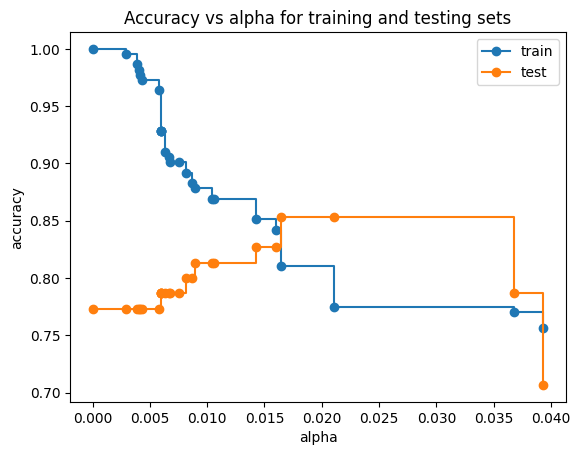

In [71]:
train_scores=[clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

best alpha=0.016 Looking at the graph, a good value for alpha might be 0.016 as the tesing accuracy is the highest at this value.



ccp part 2 Cross validation for findin best alpha

However, there are many ways data can be split into training and testing sets. To find the best alphas in general, we can use cross validation.

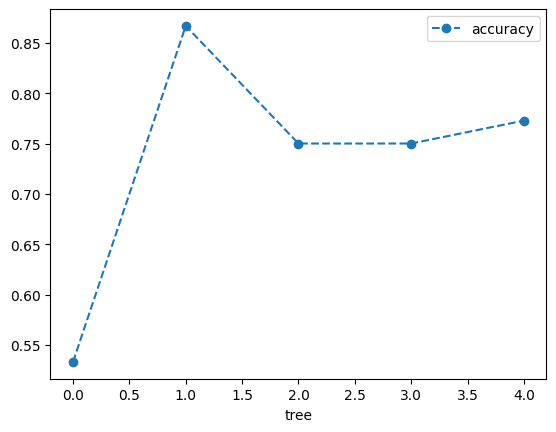

In [73]:
 from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')
plt.show()

he accuracy was high at one of the splits, but it may not the best over all possible splits. Using different training and testing datasets with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to datasets.

Here we find the best alphas over different possible splits with cross validations.

<Axes: xlabel='alpha'>

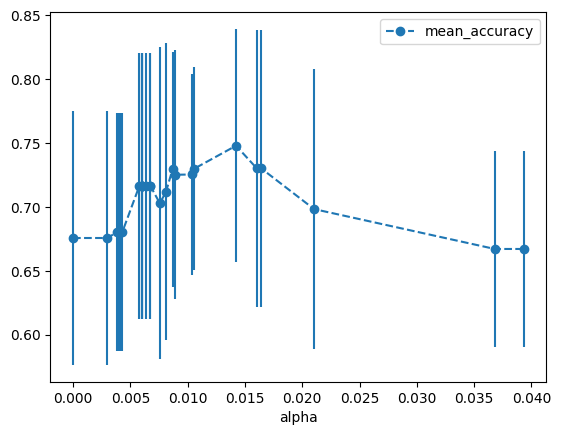

In [74]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [75]:
best_alpha = alpha_results.iloc[alpha_results['mean_accuracy'].idxmax(),]['alpha']

In [76]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

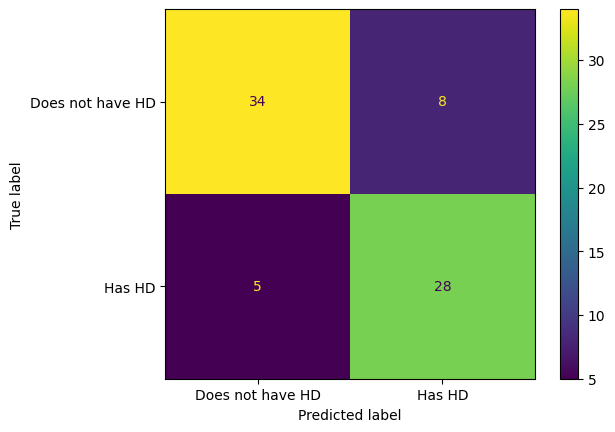

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions1=clf_dt_pruned.predict(X_test)
cm1=confusion_matrix(y_test,predictions1,labels=clf_dt_pruned.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=["Does not have HD","Has HD"])
disp.plot()


The accuracy improved significantly for the testing set.

The percentage of people without heart disease that were misclassified is now


 ~ 19%

And those with heart disease that were missed is now


 ~ 15%

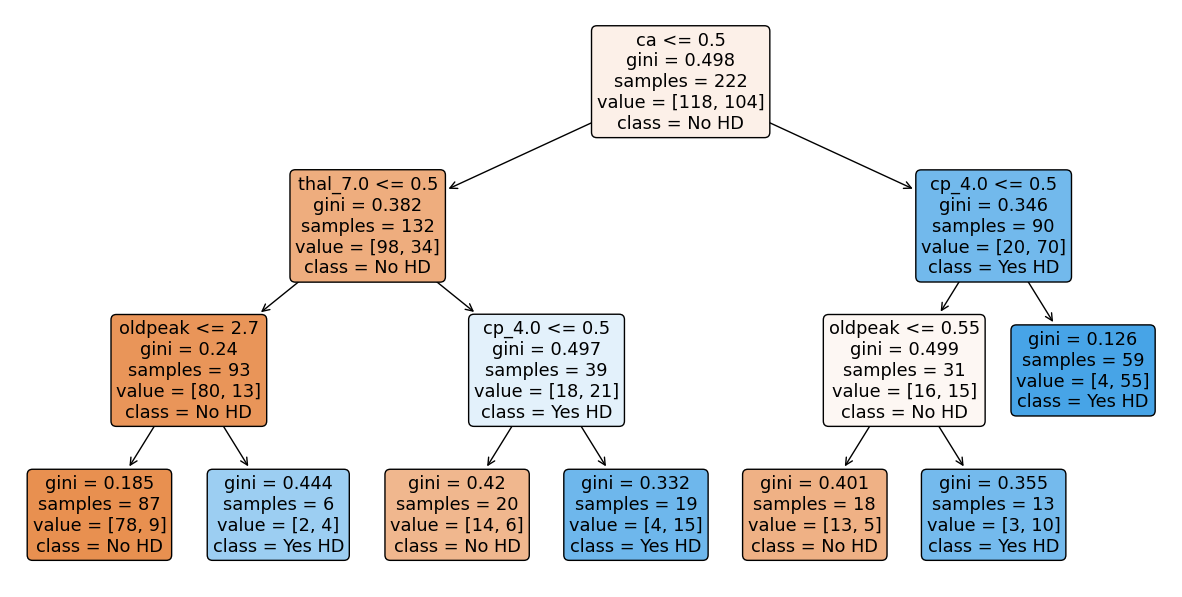

In [80]:
plt.figure(figsize=(15,7.5))
from sklearn import tree
tree.plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=["No HD","Yes HD"],
          feature_names=X_encoded.columns);


The final tree has far fewer nodes than the original tree and is much more lean, and more importantly, it leads to better performance.